## Keras Callback Mekanizması

Callback sözcüğü belli bir olay devam ederken programcının verdiği bir fonksiyonun (genel olarak callable bir nesnenin) çağrılması anlamında kullanılmaktadır. Keras'ın da bir callback mekanizması vardır. Bu sayede biz çeşitli olaylar devam ederken bu olayları sağlayan metotların bizim callable nesnelerimizi çağırmasını sağlayabiliriz. Böylece birtakım işlemler devam ederken arka planda o işlemleri izleyebilir duruma göre gerekli işlemleri yapabiliriz.

`Sequential` sınıfının `fit`, `evaluate` ve `predict` gibi metotları "callbacks" isimli bir parametre almaktadır. İşte biz bu parametreye kendi callback fonksiyonlarımızı ve sınıf nesnelerimizi verebiliriz. Bu metotlar da ilgili olaylar sırasında bizim verdiğimiz callable nesneleri çağırır.

Aslında Keras'ta hazır bazı callback sınıflar zaten vardır. Dolayısıyla her ne kadar programcı kendi callback sınıflarını yazabilirse de aslında buna fazlaca gereksinim duyulmamaktadır. Keras'ın sağladığı hazır callback sınıfları genellikle gereksinimi karşılamaktadır. Keras'ın hazır callback sınıfları `tensorflow.keras.callbacks` modülü içerisinde bulunmaktadır.


In [1]:
import pandas as pd 

df = pd.read_csv('datasets/diabetes.csv')

dataset_x = df.iloc[:, :-1].to_numpy()
dataset_y = df.iloc[:, -1].to_numpy()

from sklearn.model_selection import train_test_split

training_dataset_X, test_dataset_x, training_dataset_y, test_dataset_y = train_test_split(dataset_x, dataset_y)

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential(name='Sample')
model.add(Dense(32, activation='relu', input_dim=dataset_x.shape[1], name='Hidden-1'))
model.add(Dense(32, activation='relu', name='Hidden-2'))
model.add(Dense(1, activation='sigmoid', name='Output'))

model. summary

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['binary_accuracy'])

CSVLogger nesnesi yaratılırken __init__ metodunda CSV ismi dosyasının ismi verilir. Eğitim bittiğinde bu dosyanın içi doldurulmuş olacaktır. Örneğin:

from tensorflow.keras.callbacks import CSVLogger

hist = model.fit(training_dataset_x, training_dataset_y, batch_size=32, epochs=100, validation_split=0.2, callbacks=[CSVLogger('diabetes-epoch.csv')])

Burada fit metodunun callbacks parametresinin bir liste aldığına dikkat ediniz. Çünkü biz birden fazla callback nesnesini metoda verebiliriz.

In [2]:
from tensorflow.keras.callbacks import CSVLogger

csvlogger = CSVLogger('datasets/diabetes-epoch.csv')

hist = model.fit(training_dataset_X, training_dataset_y, batch_size=32, epochs=250, validation_split=0.2, callbacks=[csvlogger])

Epoch 1/250


15/15 [==============================] - 1s 11ms/step - loss: 3.1436 - binary_accuracy: 0.5022 - val_loss: 1.1305 - val_binary_accuracy: 0.6379
Epoch 2/250
15/15 [==============================] - 0s 4ms/step - loss: 1.1328 - binary_accuracy: 0.5804 - val_loss: 0.9101 - val_binary_accuracy: 0.6466
Epoch 3/250
15/15 [==============================] - 0s 3ms/step - loss: 0.9908 - binary_accuracy: 0.6196 - val_loss: 0.8361 - val_binary_accuracy: 0.6466
Epoch 4/250
15/15 [==============================] - 0s 2ms/step - loss: 0.8580 - binary_accuracy: 0.6348 - val_loss: 0.9476 - val_binary_accuracy: 0.5431
Epoch 5/250
15/15 [==============================] - 0s 3ms/step - loss: 0.8506 - binary_accuracy: 0.6217 - val_loss: 0.7543 - val_binary_accuracy: 0.6293
Epoch 6/250
15/15 [==============================] - 0s 2ms/step - loss: 0.9165 - binary_accuracy: 0.6304 - val_loss: 0.9230 - val_binary_accuracy: 0.5603
Epoch 7/250
15/15 [==============================] - 0s 2ms/step - 

### History Callback

En sık kullanılan callback sınıfı `History` isimli sınıftır. Aslında programcı bu callback sınıfını genellikle kendisi kullanmaz. `Sequential` sınıfının `fit` metodu zaten bu sınıf türünden bir nesneye geri dönmektedir. Örneğin:

```python
hist = model.fit(...)

fit metodunun bize verdiği History nesnesi eğitim sırasında her epoch'tan sonra elde edilen değerleri barındırmaktadır. Anımsanacağı gibi fit metodu zaten eğitim sırasında her epoch'tan sonra birtakım değerleri ekrana yazıyordu. İşte fit metodunun geri döndürdüğü bu history nesnesi aslında bu metodun ekrana yazdığı bilgileri barındırmaktadır. History nesnesinin epoch elemanı uygulanan epoch numaralarını bize verir. Ancak nesnenin en önemli elemanı history isimli öznektir. history isimli örnek özniteliği bir sözlük türündendir. Sözlüğün anahtarları yazısal olarak loss ve metrik değer isimlerini barındırır. Bunlara karşılık her epoch'taki ilgili değerleri belirten list türünden nesnelerdir. History nesnesinin history sözlüğü her zaman "loss" ve "val_loss" anahtarlarını barındırır. Bunun dışında bizim belirlediğimiz metriklere ilişkin eğitim ve sınama sonuçlarını da barındırmaktadır. Örneğin biz metrik olarak "binary_accuracy" girmiş olalım. history sözlüğü bu durumda "binary_accuracy" ve "val_binary_accuracy" isimli iki anahtara da sahip olacaktır. Burada "val_xxx" biçiminde "val" ile başlayan anahtarlar sınama verisinden elde edilen değerleri "val" ile başlamayan anahtarlar ise eğitim verisinden elde edilen verileri belirtir. "loss" değeri ve diğer metrik değerler epoch’un tamamı için elde edilen değerlerdir. Her epoch sonucunda bu değerler sıfırlanmaktadır.

Epoch’lar sonrasında History nesnesi yoluyla elde edilen bilgilerin grafiği çizilebilir. Uygulamacılar eğitimin gidişatı hakkında fikir edinebilmek için genellikle epoch grafiğini çizerler. Epoch sayıları arttıkça başarının artacağını söyleyemeyiz. Hatta tam tersine belli bir epoch’tan sonra “overfitting” denilen olgu kendini göstermekte model gitgide yanlış şeyleri öğrenir duruma gelmektedir. İşte uygulamacılar genellikle loss, val_loss, binary_accuracy, val_binary_accuracy gibi grafikleri epoch sayılarına göre çizerek bunların uyum gidip gitmediğine bakabilir. Eğitimdeki verilerle sınama verilerinin birbirlerinden kopması genel olarak kötü bir gidişata işaret etmektedir. Uygulamacı bu grafiklere bakarak uygulanması gereken epoch sayısına karar verebilir.

Aşağıdaki örnekte daha önce yapmış olduğumuz "diabetes" veri kümesi için epoch grafikleri çizilmiştir.


---

```md
## Keras Modelinde Callback Mekanizması

Keras kütüphanesinde bazı işlemlerde programcının bilgilendirilmesi için `"callback"` denilen bir mekanizma bulundurulmuştur. Bu mekanizma sayesinde `fit`, `evaluate` ve `predict` metotları işlemlerini yaparken programcının belirlediği kodları çalıştırabilmektedir. `fit`, `evaluate` ve `predict` metotlarının `callbacks` isimli parametreleri vardır. Bu parametreye callback görevini yapacak bir fonksiyon ya da sınıf nesnesi (callable bir nesne) yerleştirilir. Bazı callback sınıfları zaten hazır durumdadır. Bu nedenle de programcının kendi callback sınıflarını yazması genellikle gerekmemektedir. Ancak programcı isterse kendi callback sınıflarını da yazabilir. Biz burada önce hazır birkaç callback sınıfı ele alacağız sonra da callback sınıflarının nasıl yazılacağı hakkında bir örnek vereceğiz. Diğer callback sınıfları için Keras [dokümanlarına](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks) başvurabilirsiniz. Keras’taki tüm callback sınıfları `tensorflow.keras.callbacks` modülündeki `Callback` isimli sınıftan türetilmiş durumdadır.

---

## History Callback Sınıfı

`History` isimli callback sınıfı kayıt işlemi yapmaktadır. Yani örneğin `fit` metodu çalışırken bu callback sınıfı bizim için bazı kayıtlar tutar. `fit` metodunun çalışması bittikten sonra da biz bu kayıtları alıp kullanabiliriz. Aslında `fit` metodunun `callbacks` parametresine biz `History` callback sınıfı nesnesi yerleştirmek zorunda değiliz. `fit` metodu zaten her zaman bu kaydı yaparak bize bu `History` nesnesini geri dönüş değeri olarak vermektedir. Biz de yapılan kayıtları `fit` metodunun geri dönüş değerinden alarak kullanabiliriz. Örneğin:

```python
hist = model.fit(training_set_x, training_set_y, batch_size=30, epochs=100)


In [3]:
hist = model.fit(training_dataset_X, training_dataset_y, batch_size=32, epochs=250, validation_split=0.2)

Epoch 1/250
15/15 [==============================] - 0s 4ms/step - loss: 0.4869 - binary_accuracy: 0.7609 - val_loss: 0.5984 - val_binary_accuracy: 0.7586
Epoch 2/250
15/15 [==============================] - 0s 3ms/step - loss: 0.4701 - binary_accuracy: 0.7652 - val_loss: 0.6975 - val_binary_accuracy: 0.6121
Epoch 3/250
15/15 [==============================] - 0s 2ms/step - loss: 0.4778 - binary_accuracy: 0.7609 - val_loss: 0.7877 - val_binary_accuracy: 0.6724
Epoch 4/250
15/15 [==============================] - 0s 3ms/step - loss: 0.5019 - binary_accuracy: 0.7478 - val_loss: 0.5921 - val_binary_accuracy: 0.7155
Epoch 5/250
15/15 [==============================] - 0s 2ms/step - loss: 0.5023 - binary_accuracy: 0.7500 - val_loss: 0.5630 - val_binary_accuracy: 0.7500
Epoch 6/250
15/15 [==============================] - 0s 2ms/step - loss: 0.4883 - binary_accuracy: 0.7652 - val_loss: 0.5442 - val_binary_accuracy: 0.7759
Epoch 7/250
15/15 [==============================] - 0s 3ms/step - los

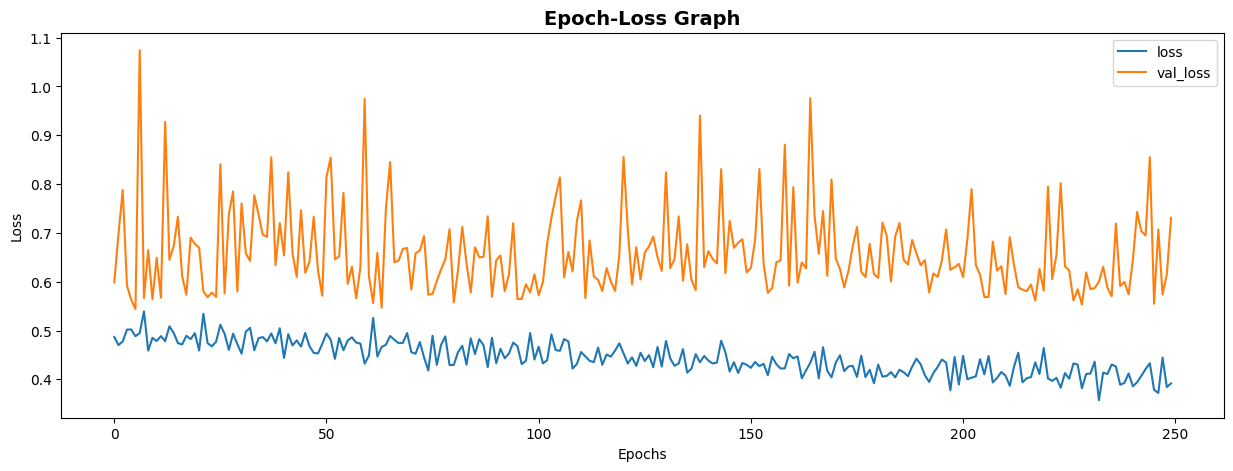

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.title('Epoch-Loss Graph', fontsize=14, fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Loss')
# plt.xticks(range(0, 210, 10))

plt.plot(hist.epoch, hist.history['loss'])
plt.plot(hist.epoch, hist.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

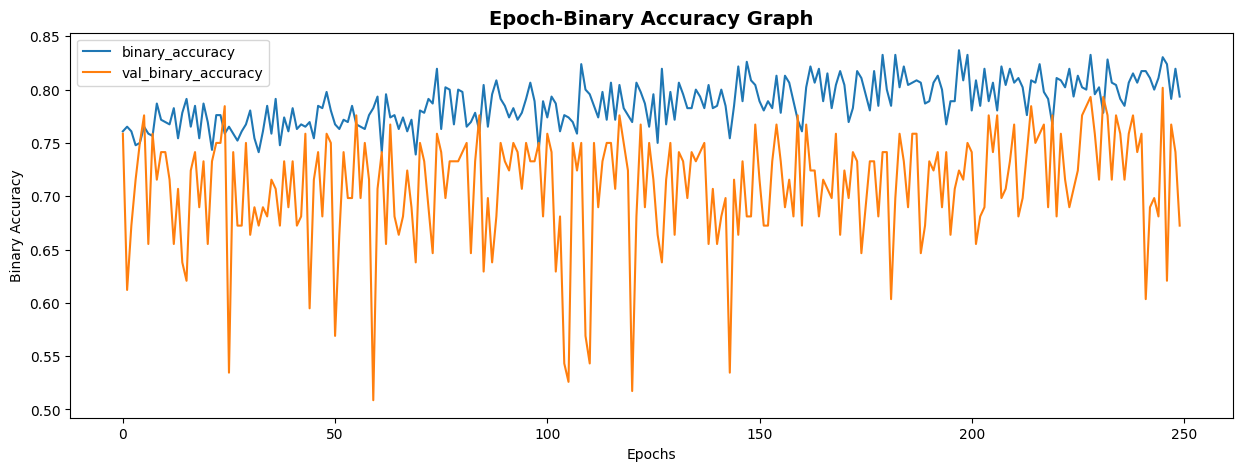

In [5]:
plt.figure(figsize=(15, 5))
plt.title('Epoch-Binary Accuracy Graph', fontsize=14, fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Binary Accuracy')
# plt.xticks(range(0, 210, 10))

plt.plot(hist.epoch, hist.history['binary_accuracy'])
plt.plot(hist.epoch, hist.history['val_binary_accuracy'])
plt.legend(['binary_accuracy', 'val_binary_accuracy'])
plt.show()

100 epochtan sonra sistemde val ler ile gerçek deeğrler arasında farklar çok fazla oluşuyor. Orada eğitimi kesmek gerekiyor.

### Lambda Callback Fonksiyonu

LambdaCallback isimli callback sınıfı bizden __init__ metodu yoluyla çeşitli fonksiyonlar alır ve bu fonksiyonları belli noktalarda çağırır. __init__ metodundaki parametreler ve anlamları şöyledir:

on_train_begin: Eğitim başladığında çağrılacak fonksiyonu belirtir.

on_train_end: Eğitim bittiğinde çağrılacak fonksiyonu belirtir.

on_epoch_begin: Her epoch başlarken çağrılacak fonksiyonu belirtir.

on_epoch_end: Her epoch bittiğinde çağrılacak fonksiyonu belirtir.

on_batch_begin: Her batch işleminin başında çağrılacak fonksiyonu belirtir.

on_batch_end: Her batch işlemi bittiğinde çağrılacak fonksiyonu belirtir.

Bu fonksiyonların parametreleri şöyle olmalıdır:

Fonksiyon          Parametreler

* on_epoch_begin  -   epoch ve logs
* on_epoch_end    -   epoch ve logs
* on_batch_begin  -   batch ve logs
* on_batch_end    -   batch ve logs
* on_train_begin  -   logs
* on_train_end    -   logs

Burada epoch parametresi epoch numarasını, batch parametresi batch numarasını belirtir. logs parametreleri ise birer sözlük belirtmektedir. Bu sözlüğün içerisinde loss değeri gibi metrik değerler gibi önemli bilgiler vardır.

In [6]:
import pandas as pd 

df = pd.read_csv('datasets/diabetes.csv')

dataset_x = df.iloc[:, :-1].to_numpy()
dataset_y = df.iloc[:, -1].to_numpy()

from sklearn.model_selection import train_test_split

training_dataset_X, test_dataset_x, training_dataset_y, test_dataset_y = train_test_split(dataset_x, dataset_y)

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential(name='Sample')
model.add(Dense(32, activation='relu', input_dim=dataset_x.shape[1], name='Hidden-1'))
model.add(Dense(32, activation='relu', name='Hidden-2'))
model.add(Dense(1, activation='sigmoid', name='Output'))

model. summary()

Model: "Sample"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-1 (Dense)            (None, 32)                288       
                                                                 
 Hidden-2 (Dense)            (None, 32)                1056      
                                                                 
 Output (Dense)              (None, 1)                 33        
                                                                 
Total params: 1377 (5.38 KB)
Trainable params: 1377 (5.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['binary_accuracy'])

from tensorflow.keras.callbacks import LambdaCallback

def on_epoch_end(epoch, logs):
    diff = logs['loss'] - logs['val_loss']
    print(f"Epoch: {epoch}, Loss: {logs['loss']}, Val_Loss: {logs['val_loss']}, Diff: {diff}")
    
lcb = LambdaCallback(on_epoch_end=on_epoch_end)

hist = model.fit(training_dataset_X, training_dataset_y, batch_size=32, epochs=250, validation_split=0.2, callbacks=[lcb], verbose=0)

Epoch: 0, Loss: 7.770452499389648, Val_Loss: 2.244149684906006, Diff: 5.526302814483643
Epoch: 1, Loss: 2.110281467437744, Val_Loss: 1.505553960800171, Diff: 0.6047275066375732
Epoch: 2, Loss: 1.3000074625015259, Val_Loss: 0.7527251839637756, Diff: 0.5472822785377502
Epoch: 3, Loss: 0.9713605642318726, Val_Loss: 0.6849920153617859, Diff: 0.28636854887008667
Epoch: 4, Loss: 0.8645873069763184, Val_Loss: 1.4647456407546997, Diff: -0.6001583337783813
Epoch: 5, Loss: 0.9086039066314697, Val_Loss: 0.6970067620277405, Diff: 0.21159714460372925
Epoch: 6, Loss: 0.8059192299842834, Val_Loss: 0.6743221879005432, Diff: 0.13159704208374023
Epoch: 7, Loss: 0.7960838079452515, Val_Loss: 0.7453207969665527, Diff: 0.05076301097869873
Epoch: 8, Loss: 0.7931931614875793, Val_Loss: 0.8459947109222412, Diff: -0.052801549434661865
Epoch: 9, Loss: 0.7878589630126953, Val_Loss: 0.820117175579071, Diff: -0.03225821256637573
Epoch: 10, Loss: 0.7358766794204712, Val_Loss: 0.6574782133102417, Diff: 0.07839846611

In [11]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['binary_accuracy'])

def on_epoch_begin(epoch, logs):
    print(f"Epoch: {epoch} begins...", end='\n')

def on_epoch_end(epoch, logs):
    print(f"Epoch: {epoch} ends...", end='\n')

def on_batch_end(batch, logs):
    print(f"Batch: {batch} Loss: {logs['loss']}", end='\n')

lcb = LambdaCallback(on_batch_end=on_batch_end, on_epoch_begin=on_epoch_begin, on_epoch_end=on_epoch_end)

hist = model.fit(training_dataset_X, training_dataset_y, batch_size=32, epochs=250, validation_split=0.2, callbacks=[lcb], verbose=0)

Epoch: 0 begins...
Batch: 0 Loss: 0.4539903700351715
Batch: 1 Loss: 0.5631639361381531
Batch: 2 Loss: 0.5312173366546631
Batch: 3 Loss: 0.6125953197479248
Batch: 4 Loss: 0.5864680409431458
Batch: 5 Loss: 0.5530351400375366
Batch: 6 Loss: 0.5403351187705994
Batch: 7 Loss: 0.5496839880943298
Batch: 8 Loss: 0.5739586353302002
Batch: 9 Loss: 0.5834475755691528
Batch: 10 Loss: 0.5741260051727295
Batch: 11 Loss: 0.5641613602638245
Batch: 12 Loss: 0.5477584004402161
Batch: 13 Loss: 0.528643012046814
Batch: 14 Loss: 0.5281412601470947
Epoch: 0 ends...
Epoch: 1 begins...
Batch: 0 Loss: 0.27981385588645935
Batch: 1 Loss: 0.3771106004714966
Batch: 2 Loss: 0.3723258078098297
Batch: 3 Loss: 0.3588854968547821
Batch: 4 Loss: 0.39745625853538513
Batch: 5 Loss: 0.43246880173683167
Batch: 6 Loss: 0.4714207053184509
Batch: 7 Loss: 0.45328930020332336
Batch: 8 Loss: 0.44736847281455994
Batch: 9 Loss: 0.44758057594299316
Batch: 10 Loss: 0.4503892660140991
Batch: 11 Loss: 0.446573942899704
Batch: 12 Loss: 

Burada epoch parametresi epoch numarasını, batch parametresi batch numarasını belirtir. logs parametreleri ise birer sözlük belirtmektedir. Bu sözlüğün içerisinde loss değeri gibi metrik değerler gibi önemli bilgiler vardır. epoch'lar için logs parametresi History nesnesindeki anahtarları içermektedir. Ancak batch'ler için logs parametresi "val" ön ekli değerleri içermeyecektir.

Aşağıdaki örnekte LambdaCallback callback sınıfı yoluyla her epoch sonucunda "loss" değeri ile "val_loss" değeri arasındaki fark yazdırılmıştır. Bu örnekte fit metodu zaten ekrana bir şeyler yazdırdığı için fit metodunun verbose parametresi 0 yapılarak onun ekrana bir şey yazması engellenmiştir. Böylece ekrana yalnızca callback fonksiyon bir şey yazmış olacaktır.

Aslında programcının kendisi de kendi callback sınıflarını yazabilmektedir. Bunun için programcının kendi callback sınıflarını
tensorflow.keras.callbacks modülündeki Callback sınıfından türetmesi gerekir. Örneğin:

```python
from tensorflow.keras.callbacks import Callback

class MyCallback(Callback):
    pass

İşte eğitim sırasında (ya da diğer işlemler sırasında) bizim yazdığımız sınıfın bazı metotları çağrılmaktadır. Biz bu metotları yazmasak da taban Callback sınıfındaki metotlar çağrılır. Dolayısıyla sorun çıkmaz. Biz bu metotlardan istediğimizi yazabiliriz. Bu metotların listesi şöyledir:

on_epoch_begin

on_epoch_end

on_batch_begin

on_batch_end

on_train_begin

on_train_end

Tabii bir sınıf söz konusu olduğuna göre bu metotların birinci parametreleri self olacaktır. Diğer parametreleri yukarıdaki LambdaCallback sınıfında açıkladığımız parametrelerdir.

| Fonksiyon         | Parametreler      |
| ----------------- | ----------------- |
| `on_epoch_begin`  | epoch ve logs      |
| `on_epoch_end`    | epoch ve logs      |
| `on_batch_begin`  | batch ve logs      |
| `on_batch_end`    | batch ve logs      |
| `on_train_begin`  | logs               |
| `on_train_end`    | logs               |

In [15]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['binary_accuracy'])

from tensorflow.keras.callbacks import Callback

class MyCallBack(Callback):
    def __init__(self):
        self.total_loss = 0 
        self.epochs = 0

    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch: {epoch}, Loss: {logs['loss']}")
        self.total_loss += logs['loss']
        self.epochs += 1

    def on_train_end(self, batch, logs=None):
        ratio = self.total_loss / self.epochs
        print(f"Average Loss: {ratio}")

mcb = MyCallBack()

hist = model.fit(training_dataset_X, training_dataset_y, batch_size=32, epochs=250, validation_split=0.2, callbacks=[mcb], verbose=0)

Epoch: 0, Loss: 0.39665400981903076
Epoch: 1, Loss: 0.33949947357177734
Epoch: 2, Loss: 0.3415130078792572
Epoch: 3, Loss: 0.3195319175720215
Epoch: 4, Loss: 0.3685174286365509
Epoch: 5, Loss: 0.32987716794013977
Epoch: 6, Loss: 0.33751872181892395
Epoch: 7, Loss: 0.35206103324890137
Epoch: 8, Loss: 0.3416925370693207
Epoch: 9, Loss: 0.34591978788375854
Epoch: 10, Loss: 0.3235611915588379
Epoch: 11, Loss: 0.3482031524181366
Epoch: 12, Loss: 0.33403563499450684
Epoch: 13, Loss: 0.34339892864227295
Epoch: 14, Loss: 0.3676353991031647
Epoch: 15, Loss: 0.33843493461608887
Epoch: 16, Loss: 0.35031116008758545
Epoch: 17, Loss: 0.3241494297981262
Epoch: 18, Loss: 0.3318201005458832
Epoch: 19, Loss: 0.3272184431552887
Epoch: 20, Loss: 0.3329579830169678
Epoch: 21, Loss: 0.3350435197353363
Epoch: 22, Loss: 0.3492663502693176
Epoch: 23, Loss: 0.3133614659309387
Epoch: 24, Loss: 0.3211561441421509
Epoch: 25, Loss: 0.335319846868515
Epoch: 26, Loss: 0.3210538923740387
Epoch: 27, Loss: 0.3275662660

| Metot             | Parametreler       |
| ----------------- | ------------------ |
| `on_epoch_begin`  | self, epoch ve logs |
| `on_epoch_end`    | self, epoch ve logs |
| `on_batch_begin`  | self, batch ve logs |
| `on_batch_end`    | self, batch ve logs |
| `on_train_begin`  | self, logs          |
| `on_train_end`    | self, logs          |

---

Örneğin:

```python
from tensorflow.keras.callbacks import Callback

class MyCallback(Callback):
    def on_epoch_end(self, epoch, logs):
        print(f'Epoch: {epoch}, Loss: {logs["loss"]}')

mcb = MyCallback()

hist = model.fit(training_dataset_x, training_dataset_y, batch_size=32, epochs=100, validation_split=0.2, callbacks=[mcb], verbose=0)

Peki zaten LambdaCallback çeşitli durumlarda bizim verdiğimiz fonksiyonları çağırıyordu. O zaman custom Callback sınıfı yazmamızın bir gerekçesi olabilir mi? İşte sınıflar bir faaliyet alanına sahip olduğu için ve örnek özniteliklerinde bilgi tutabildikleri için karmaşık işlemlerde daha iyi bir araç sunmaktadır.

Aşağıdaki örnekte bir custom Callback sınıfı yazılmıştır. Bu sınıfta her epoch sonunda loss değerleri toplanıp en sonunda ortalaması yazdırılmıştır.

In [17]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['binary_accuracy'])

from tensorflow.keras.callbacks import Callback

class MyLambdaCallBack(Callback):
    def __init__(self, on_epoch_begin=None, on_epoch_end=None, on_batch_begin=None, on_batch_end=None, on_train_begin=None, on_train_end=None):
        self._on_epoch_begin = on_epoch_begin
        self._on_epoch_end = on_epoch_end
        self._on_batch_begin = on_batch_begin
        self._on_batch_end = on_batch_end
        self._on_train_begin = on_train_begin
        self._on_train_end = on_train_end

    def on_epoch_begin(self, epoch, logs=None):
        if self._on_epoch_begin:
            self._on_epoch_begin(epoch, logs)
    
    def on_epoch_end(self, epoch, logs=None):
        if self._on_epoch_end:
            self._on_epoch_end(epoch, logs)
        
    def on_batch_begin(self, batch, logs=None):
        if self._on_batch_begin:
            self._on_batch_begin(batch, logs)

    def on_batch_end(self, batch, logs=None):
        if self._on_batch_end:
            self._on_batch_end(batch, logs)
    
    def on_train_begin(self, batch, logs=None):
        if self._on_train_begin:
            self._on_train_begin(batch, logs)
    
    def on_train_end(self, batch, logs=None):
        if self._on_train_end:
            self._on_train_end(batch, logs)

def on_epoch_begin(epoch, logs):
    print(f"Epoch: {epoch} begins...", end='\n')

def on_epoch_end(epoch, logs):
    print(f"Epoch: {epoch} ends...", end='\n')

def on_batch_end(batch, logs):
    print(f"Batch: {batch} Loss: {logs['loss']}", end='\n')

mlcb = MyLambdaCallBack(on_epoch_begin=on_epoch_begin, on_epoch_end=on_epoch_end, on_batch_end=on_batch_end)

hist = model.fit(training_dataset_X, training_dataset_y, batch_size=32, epochs=250, validation_split=0.2, callbacks=[mlcb], verbose=0)

Epoch: 0 begins...
Batch: 0 Loss: 0.3439704179763794
Batch: 1 Loss: 0.4626454710960388
Batch: 2 Loss: 0.4277265965938568
Batch: 3 Loss: 0.3765614628791809
Batch: 4 Loss: 0.36437085270881653
Batch: 5 Loss: 0.3590063154697418
Batch: 6 Loss: 0.3579098880290985
Batch: 7 Loss: 0.3323214054107666
Batch: 8 Loss: 0.3448069095611572
Batch: 9 Loss: 0.3316638171672821
Batch: 10 Loss: 0.3170090615749359
Batch: 11 Loss: 0.3018602430820465
Batch: 12 Loss: 0.29370877146720886
Batch: 13 Loss: 0.28902390599250793
Batch: 14 Loss: 0.28596675395965576
Epoch: 0 ends...
Epoch: 1 begins...
Batch: 0 Loss: 0.23590457439422607
Batch: 1 Loss: 0.22397765517234802
Batch: 2 Loss: 0.22618579864501953
Batch: 3 Loss: 0.24309709668159485
Batch: 4 Loss: 0.21130406856536865
Batch: 5 Loss: 0.21221299469470978
Batch: 6 Loss: 0.23165881633758545
Batch: 7 Loss: 0.23245170712471008
Batch: 8 Loss: 0.22889351844787598
Batch: 9 Loss: 0.23157048225402832
Batch: 10 Loss: 0.24404381215572357
Batch: 11 Loss: 0.24909843504428864
Batc